In [445]:
"""
import modules
"""
from prepare_data import prepare_df_from_mac_5_year as prepare_data
from emulate_reduction import emulator_v2 as emulate
from visualize_output import vis_emulator_v1 as v1_plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

dir(emulate)

['CtaxRedEmulator',
 'LinearRegression',
 'PolynomialFeatures',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'mean_squared_error',
 'minimize',
 'np',
 'pd',
 'plt',
 'r2_score',
 'train_test_split']

In [2]:
"""
load data
"""

PATH = 'C:/Users/toonv/Documents/PBL/Data/cost curves/'
FILENAME_LIN = 'costcurve_co2_linear.dat'
FILENAME_CUBIC = 'costcurve_co2_cubic.dat'
FILENAME_CUBICROOT = 'costcurve_co2_cubicroot.dat'

df_linear = pd.read_table(PATH + FILENAME_LIN,
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubic = pd.read_table(PATH + FILENAME_CUBIC,
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubicroot = pd.read_table(PATH + FILENAME_CUBICROOT,
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_combined = pd.concat([df_linear, df_cubic, df_cubicroot])
df_cubic_cubicroot = pd.concat([df_cubic, df_cubicroot]) 

df_linear.tail()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1812,152.7454,122.7606,159.0897,95.1323,192.7731,147.7767,100.9639,108.2965,116.3986,123.697,...,124.3786,98.1313,83.3552,113.3752,96.289,142.8112,113.6885,199.4944,102.5987,153.046
1813,152.7464,122.7616,159.2357,95.1333,192.7741,147.7777,100.9649,108.3192,116.3996,123.698,...,124.3796,98.1853,83.3562,113.3762,96.290,142.8122,113.6895,199.4954,102.5997,153.047
1814,152.7474,122.7626,159.4093,95.1343,192.7751,147.7787,100.9659,108.3972,116.4006,123.699,...,124.3806,98.2047,83.3572,113.3772,96.291,142.8132,113.6905,199.4964,102.6007,153.048
1815,152.7484,122.8050,159.6175,95.1353,192.7761,147.7797,100.9669,108.5443,116.4016,123.700,...,124.3816,98.2057,83.3582,113.3782,96.292,142.8142,113.6915,199.4974,102.6017,153.049
1816,152.7494,122.9983,159.8408,95.1363,192.9718,147.7807,100.9679,108.6551,116.4026,123.701,...,124.3826,98.2067,83.3592,113.3792,96.293,142.8152,113.6925,199.4984,102.6027,153.050


In [65]:
"""
global variables 

year, region functie aanroepen waar je jaar en regio in kan vullen die alle stappen dan uitvoert.\\

dit zijn global constants dus kan gewoon in kleine letters

"""

year = 2040
region = 11
TIMERSTEP = 5

In [406]:
"""
prepare data using prepare_df

input: MAC sets (df), YEAR, REGION, STEPSIZE

output: ctax paths with reduction
"""

reload(prepare_data)

lin_reduction = prepare_data.reduction_df(df_linear, year, region)
cubic_reduction = prepare_data.reduction_df(df_cubic, year, region)
root_reduction = prepare_data.reduction_df(df_cubicroot, year, region)

lin_paths = prepare_data.find_path(lin_reduction, 'linear', TIMERSTEP)
cubic_paths = prepare_data.find_path(cubic_reduction, 'cubic', TIMERSTEP)
root_paths = prepare_data.find_path(root_reduction, 'cubicroot', TIMERSTEP)

combi = pd.concat([cubic_paths, root_paths, lin_paths])
combi.year = cubic_paths.year
combi.region = cubic_paths.region

root_paths.head()

,2020,2025,2030,2035,2040,reduction
0,0.0,0.000000,0.000000,0.000000,0.0,0.0000
1,0.0,12.599210,15.874011,18.171206,20.0,15.8895
2,0.0,25.198421,31.748021,36.342412,40.0,16.8243
3,0.0,37.797631,47.622032,54.513618,60.0,17.9111
4,0.0,50.396842,63.496042,72.684824,80.0,18.9866


C:\Users\toonv\Documents\PBL\Code\Emulator\emulate_reduction\emulator_v1_MLR_gen_2.py:56: RuntimeWarning: invalid value encountered in true_divide
  delta_c_norm = delta_cs / final_ctax[:, None]


weights dataframe: 
            0          1  ctax
0 -11.362173  -6.118093   400
1 -18.004276  -9.694610   800
2 -11.771655  -6.338583  1200
3 -15.338060  -8.258955  1600
4 -19.674892 -10.594172  2000
5 -26.235224 -14.126659  2400
6 -28.142464 -15.153634  2800
7 -23.516594 -12.662782  3200
8 -22.608773 -12.173954  3600
9 -25.236824 -13.589059  4000


C:\Users\toonv\Documents\PBL\Code\Emulator\emulate_reduction\emulator_v1_MLR_gen_2.py:129: RuntimeWarning: invalid value encountered in true_divide
  delta_c_norm = delta_cs / final_ctax[:, None]


,real reduction,final ctax,test reduction
0,13.1082,60.0,30.354355
1,33.5270,540.0,48.900270
2,38.6036,740.0,61.727224
3,39.5596,780.0,62.435913
4,42.9311,1060.0,56.756327
5,43.0692,1080.0,56.813577
6,43.8324,1200.0,57.091682
7,45.7652,1380.0,58.296838
8,48.7211,1680.0,63.469235
9,49.5345,2000.0,66.290589


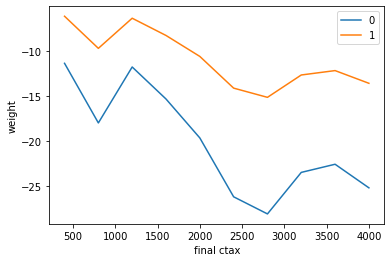

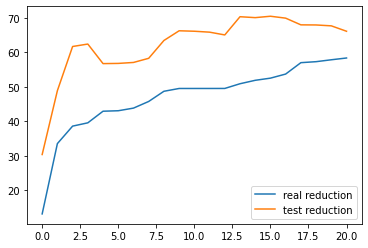

In [430]:
"""
train prepared dataframe 

input: ctax paths with reduction

output: trained dataset
"""

reload(emulate)

x = emulate.CtaxRedEmulator(lin_paths, cubic_paths)

x.train_ctax_path(20, 2)   
    
x.test_ctax_paths() 


In [454]:
reload(emulate)

x = emulate.CtaxRedEmulator(lin_paths, combi)

MLR_mod = x.train_ctax_LR(2)

x.test_MR(MLR_mod)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 21 is different from 5)

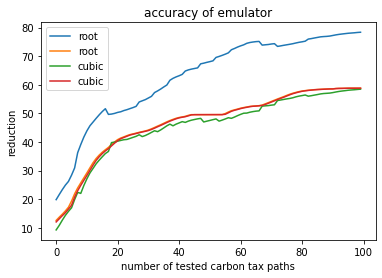

In [446]:
"""
Figures showing the emulated reduction vs real reduction

Also calculation of MSE

zelfde kleuren maar andere weergave
"""

reload(v1_plot)

v1_plot.emulator_v1_graphs(cubic_test, root_test)